In [43]:
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Label: 0\n')

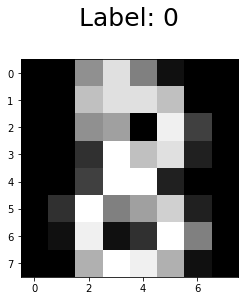

In [44]:
digits = load_digits()
plt.imshow(np.reshape(digits.data[8], (8, 8)), cmap='gray')
plt.title('Label: %i\n' % digits.target[0], fontsize=25)

In [45]:
test_size_num = 0.7 #when rise the test_size_num ,the acc of sgd and dt is rising ,but the knn 
#is decrese ,but over all ,the acc of knn keep larger than others ,so choose the 0.7 as test_size_num
x_train,x_test,y_train,y_test= train_test_split(digits.data,digits.target,test_size= test_size_num ,random_state=0)

In [46]:
knn_predict = KNeighborsClassifier(n_neighbors=3)  #try to test number form 1 to 10 ,find the 
#acc is lagerst when n_neighbors=3 or 5, then ,when the number grow ,the acc gets down.
#then finally choose 3 
#3 0.973 4 0.968 5 0.973  6 0.967 7 0.968 10 0.959
sgd_predict = SGDClassifier()
dtc_predict = DecisionTreeClassifier()

In [47]:
knn_predict.fit(x_train,y_train)
sgd_predict.fit(x_train,y_train)
dtc_predict.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [48]:
knn_y = knn_predict.predict(x_test)
sgd_y = sgd_predict.predict(x_test)
dtc_y = dtc_predict.predict(x_test)

In [49]:
knn_info = [metrics.accuracy_score(y_test, knn_y),\
            metrics.recall_score(y_test, knn_y, average='macro')]
sgd_info =[metrics.accuracy_score(y_test, sgd_y),\
            metrics.recall_score(y_test, sgd_y , average='macro')]
dtc_info =[metrics.accuracy_score(y_test, dtc_y),\
            metrics.recall_score(y_test, dtc_y, average='macro')]

In [50]:
print('COMP 9517 LAB 4 Z5196480')
print()
print(f'Test size = {test_size_num}')
print(f'KNN Accuracy:  {knn_info[0]:0.3f}      Recall:  {knn_info[1]:0.3f}')
print(f'SGD Accuracy:  {sgd_info[0]:0.3f}      Recall:  {sgd_info[1]:0.3f}')
print(f'DT Accuracy:   {dtc_info[0]:0.3f}      Recall:  {dtc_info[1]:0.3f}')
print() 
print('KNN Confusion matrix')
print(metrics.confusion_matrix(y_test, knn_y))

COMP 9517 LAB 4 Z5196480

Test size = 0.7
KNN Accuracy:  0.973      Recall:  0.974
SGD Accuracy:  0.941      Recall:  0.942
DT Accuracy:   0.765      Recall:  0.767

KNN Confusion matrix
[[129   0   0   0   0   0   0   0   0   0]
 [  0 124   0   0   0   0   0   0   0   0]
 [  0   1 119   0   0   0   0   0   0   0]
 [  0   0   1 125   0   0   0   1   2   0]
 [  0   0   0   0 118   0   0   1   0   1]
 [  0   0   0   0   2 134   1   0   0   3]
 [  0   0   0   0   0   0 126   0   1   0]
 [  0   0   0   0   0   0   0 116   0   0]
 [  0  10   1   1   0   0   1   1 113   1]
 [  0   0   0   2   0   2   0   0   1 120]]


In [19]:
#print(metrics.confusion_matrix(y_test, sgd_y))

In [20]:
#print(metrics.confusion_matrix(y_test, dtc_y))